# Load dataset

In [61]:
import pylab as pl
import numpy as np
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

# Visualize

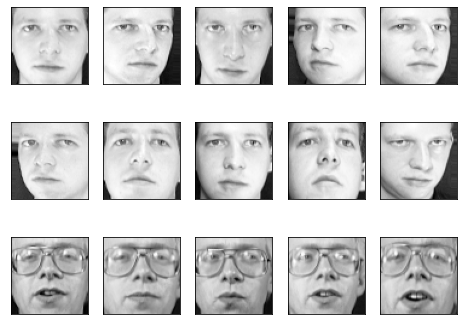

In [62]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8,6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i+1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap='Greys_r')

# Train-test split (optional)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


# Preprocessing using PCA

## Set the number of principal components here:

In [75]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=100, whiten=True)
pca.fit(X_train)

PCA(n_components=100, whiten=True)

In [76]:
print(f'\nNumber of components:\t{np.shape(pca.components_)[0]} \nSize of the PCs:\t{np.shape(pca.components_)[1]}')


Number of components:	100 
Size of the PCs:	4096


# Visualize the principal components

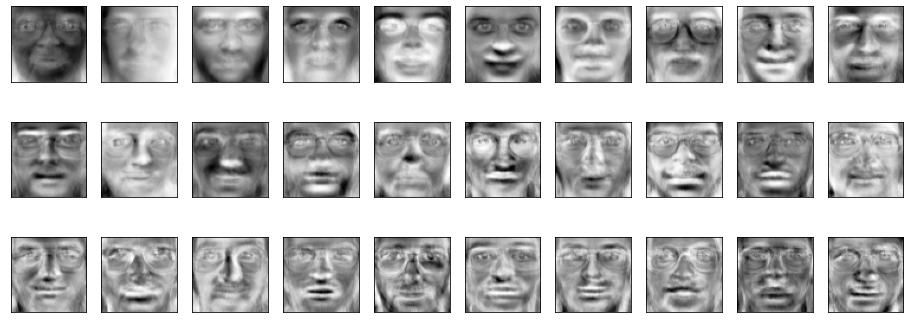

In [77]:
fig = plt.figure(figsize=(16,6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i+1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape), cmap='Greys_r')

(from scipy-lectures): We see that the first few components seem to primarily take care of lighting conditions; the remaining components pull out certain identifying features: the nose, eyes, eyebrows, etc.

# Project onto PCA basis

In [96]:
# X is projected on the first principal components previously extracted from a training set.
X_train_pca = pca.transform(X_train)  #
X_test_pca = pca.transform(X_test)

In [79]:
print(X_train_pca.shape)  # first number: size of the training set, second number: dimension of the data in the PC representation. Original was: 4096

(300, 100)


# How the reconstruction looks like vs. the original data

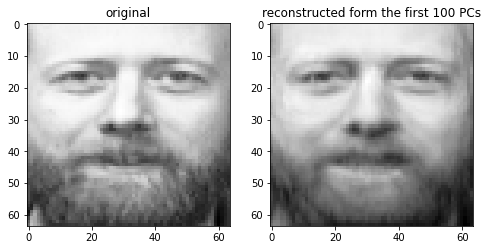

In [97]:
#original
face_0 = X_train[0].reshape(faces.images[0].shape)
face_0
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,2,1, title='original')
ax.imshow(face_0, cmap='Greys_r')  # original
#reconstructed
ax = fig.add_subplot(1,2,2, title=f'reconstructed form the first {100} PCs')
X_reconstructed = pca.inverse_transform(X_train_pca)
ax.imshow(X_reconstructed[0].reshape([64,64]), cmap='Greys_r')

# How fast do we converge to the original features? What is the relevant space dimension?

In [104]:
# full PCA (300 components)
pca_300 = decomposition.PCA(n_components=300, whiten=True)
X_train_pca_300 = pca_300.fit(X_train)

In [107]:
explained_variance_ratio = X_train_pca_300.explained_variance_ratio_

In [133]:
incremental_var_ratio = np.cumsum(explained_variance_ratio) # Percentage of variance explained by each of the selected components.

(0.0, 1.0)

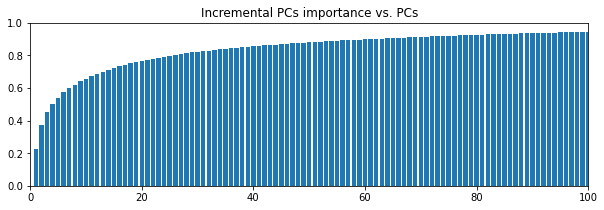

In [132]:
plt.figure(figsize=[10,3])
plt.bar(np.linspace(1,300, 300), incremental_var_ratio)
plt.title('Incremental PCs importance vs. PCs')
plt.xlim(0,100)
plt.ylim(0,1)
#the first three component capture 50% of the variance

## Let us take just 10 firt components

In [150]:

#small number of the PCA: 10
pca_10 = decomposition.PCA(n_components=10, whiten=True)
pca_10.fit(X_train)
X_train_pca_10 = pca_10.transform(X_train)

In [151]:
# X_train_pca_10_reconstructed
X_train_pca_10_reconstructed = pca_10.inverse_transform(X_train_pca_10)

In [158]:
image_0_10_pcas = X_train_pca_10_reconstructed[0].reshape([64,64]) # reconstructed image using 10 pcas

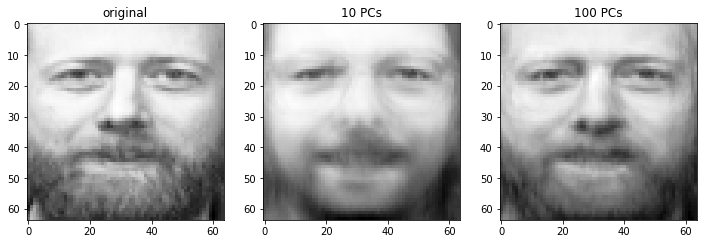

In [163]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,3,1, title='original')
ax.imshow(face_0, cmap='Greys_r')  # original
ax = fig.add_subplot(1,3,2, title=f'{10} PCs')
X_reconstructed = pca.inverse_transform(X_train_pca)
ax.imshow(image_0_10_pcas, cmap='Greys_r')
ax = fig.add_subplot(1,3,3, title=f'{100} PCs')
ax.imshow(X_reconstructed[0].reshape([64,64]), cmap='Greys_r')

# A face from the test set

In [210]:
test_faces = pca_300.transform(X_test)
test_faces_100 = pca.transform(X_test)
test_faces_10 = pca_10.transform(X_test)
test_faces_reconstructed = pca_300.inverse_transform(test_faces)
test_faces_reconstructed_100 = pca.inverse_transform(test_faces_100)
test_faces_reconstructed_10 = pca_10.inverse_transform(test_faces_10)

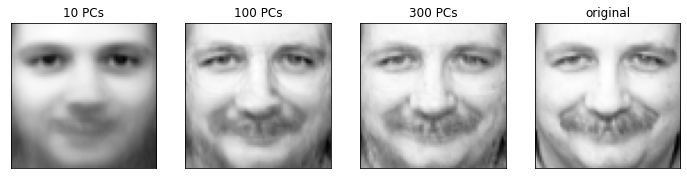

In [253]:
number_of_test_face = 4

fig_test = plt.figure(figsize=[12,4])
ax1 = fig_test.add_subplot(1,4,1, xticks=[], yticks=[], title='10 PCs')
ax1.imshow(test_faces_reconstructed_10[number_of_test_face].reshape(64,64), cmap='Greys_r')
ax1 = fig_test.add_subplot(1,4,2, xticks=[], yticks=[], title='100 PCs')
ax1.imshow(test_faces_reconstructed_100[number_of_test_face].reshape(64,64), cmap='Greys_r')
ax1 = fig_test.add_subplot(1,4,3, xticks=[], yticks=[], title='300 PCs')
ax1.imshow(test_faces_reconstructed[number_of_test_face].reshape(64,64), cmap='Greys_r')
ax1 = fig_test.add_subplot(1,4,4, xticks=[], yticks=[], title='original')
ax1.imshow(X_test[number_of_test_face].reshape(64,64), cmap='Greys_r')

#ax1 = fig_test.add_subplot(1,3,3, xticks=[], yticks=[], title='10 PCs')
#ax1.imshow(test_faces_reconstructed_10[number_of_test_face].reshape(64,64), cmap='Greys_r')